In [21]:
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [22]:
abalone


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell wbeight",
    "Rings",
]

In [24]:
# Adding sex column values

sex_dummies = pd.get_dummies(abalone['Sex'], prefix='sex')
 
abalone = pd.concat([abalone, sex_dummies], axis=1)
 
abalone= abalone.drop(['Sex'], axis=1)

abalone


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell wbeight,Rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [25]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell wbeight     0.627574
Rings             1.000000
sex_F             0.250279
sex_I            -0.436063
sex_M             0.181831
Name: Rings, dtype: float64

In [26]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=61539
)

In [75]:
# Getting model and error for predicting test values
from sklearn.metrics import mean_squared_error
from math import sqrt

def get_model_and_error(neighbors_num, X_train, y_train):
  knn_model = KNeighborsRegressor(n_neighbors=neighbors_num)
  knn_model.fit(X_train, y_train)
  test_preds = knn_model.predict(X_test)
  mse = mean_squared_error(y_test, test_preds)
  rmse = sqrt(mse)
  return knn_model, rmse

In [96]:
# Choosing best K value analyzing the prediction of test values

_, rmse_k1 = get_model_and_error(1,X_train,y_train)
k_test_arr = [2,3,4,5,6,7,8,9]
smallest_err = rmse_k1
best_k_value = 0
for i in k_test_arr:
  _, rmse = get_model_and_error(i,X_train,y_train)
  if rmse < smallest_err:
    smallest_err = rmse
    best_k_value = i
  print(rmse)
print(best_k_value)
print(smallest_err)

2.555543275980021
2.398913230818325
2.3963407860067454
2.358239145215919
2.355915727582482
2.3219004199996376
2.307815635698226
2.301172630469091
9
2.301172630469091


In [56]:

knn_model = KNeighborsRegressor(n_neighbors=best_k_value)

In [57]:
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=7)

In [58]:

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.876077288574906

In [59]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.3219004199996376

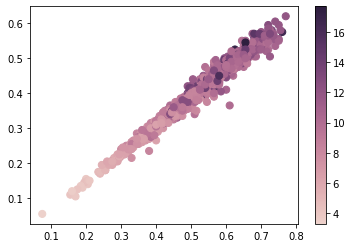

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

(array([  2.,  32., 138., 244., 208., 140.,  33.,  21.,  12.,   6.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <a list of 10 Patch objects>)

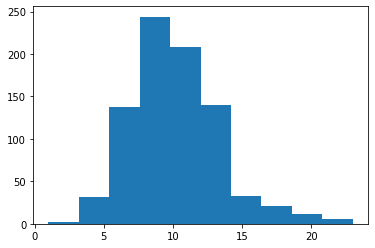

In [74]:
plt.hist(y_test)

(array([ 14.,  35., 116., 162., 233., 141.,  77.,  38.,  11.,   9.]),
 array([ 3.28571429,  4.72857143,  6.17142857,  7.61428571,  9.05714286,
        10.5       , 11.94285714, 13.38571429, 14.82857143, 16.27142857,
        17.71428571]),
 <a list of 10 Patch objects>)

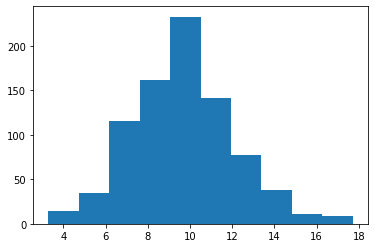

In [73]:
plt.hist(test_preds)